In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from PIL import Image
import tensorflow as tf
from tensorflow.keras import models,layers


In [ ]:
Image_Size=300
Batch_Size=32

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Leaf disease dataset",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size


)

Found 3006 files belonging to 2 classes.


# New Section

In [ ]:
class_names=dataset.class_names
class_names

['train', 'validation']

In [ ]:
len(dataset)

94

In [ ]:
for i,j in dataset.take(1):
  print(i.shape)
  print(j.numpy())

(32, 300, 300, 3)
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0]


In [ ]:
for i,j in dataset.take(1):
  print(i[0].numpy())

[[[216.80513 215.80513 229.80513]
  [212.32193 212.      224.64386]
  [214.56488 213.58987 227.53987]
  ...
  [212.70901 212.70901 224.70901]
  [213.16486 212.59872 225.50708]
  [212.67395 212.51793 224.82999]]

 [[215.38115 215.26923 225.86307]
  [213.59578 212.93155 225.89   ]
  [210.90112 210.90112 221.31187]
  ...
  [210.97498 209.97498 223.97498]
  [210.25977 209.44482 223.0747 ]
  [215.54112 215.21918 226.73079]]

 [[213.30875 212.92361 225.69388]
  [213.22575 213.22575 225.22575]
  [210.90187 210.90187 222.85312]
  ...
  [210.7781  209.82687 223.72934]
  [210.08752 209.11253 223.06253]
  [213.18568 213.17056 225.2008 ]]

 ...

 [[222.31532 222.71033 229.1402 ]
  [225.815   226.815   231.7946 ]
  [219.95178 220.0256  227.9499 ]
  ...
  [203.8755  209.8755  223.92305]
  [206.51225 212.71771 223.88663]
  [197.63939 207.03441 210.84935]]

 [[219.92708 221.22404 228.34695]
  [219.36266 219.81494 227.66418]
  [223.07962 223.28506 230.64839]
  ...
  [202.80605 207.80142 229.42293]
  [2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np

data_dir = '/content/drive/MyDrive/Leaf disease dataset/train'


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(Image_Size,Image_Size),
    batch_size=Batch_Size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(Image_Size,Image_Size),
    batch_size=Batch_Size,
    class_mode='categorical',
    subset='validation'
)



Found 2268 images belonging to 9 classes.
Found 558 images belonging to 9 classes.


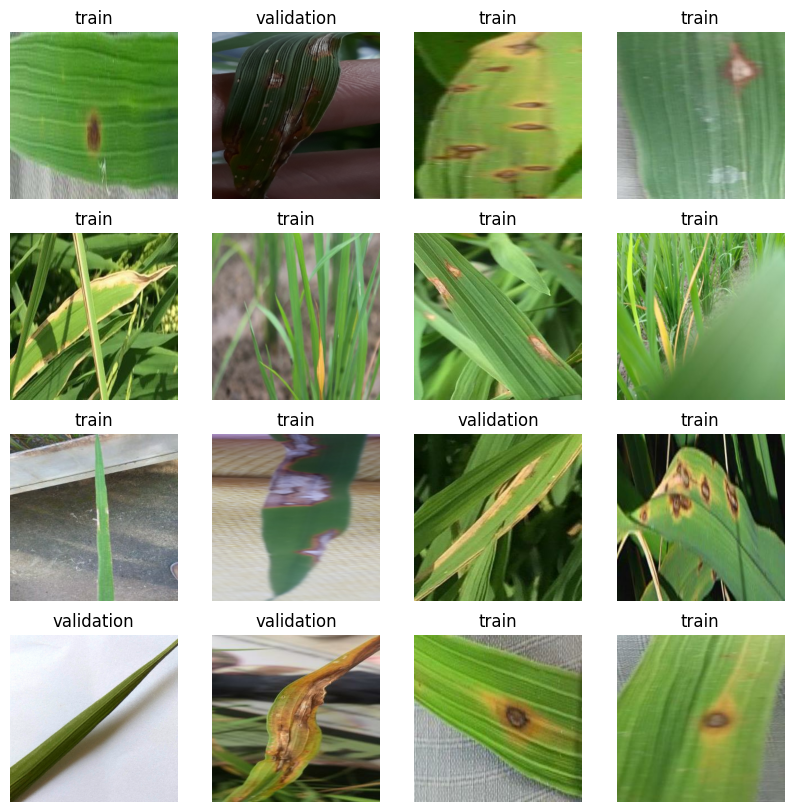

In [ ]:
plt.figure(figsize=(10,10))
for i,j in dataset.take(1):
  for z in range(16):
    pics=plt.subplot(4,4,z+1)
    plt.imshow(i[z].numpy().astype("uint8"))
    plt.title(class_names[j[z]])
    plt.axis("off")

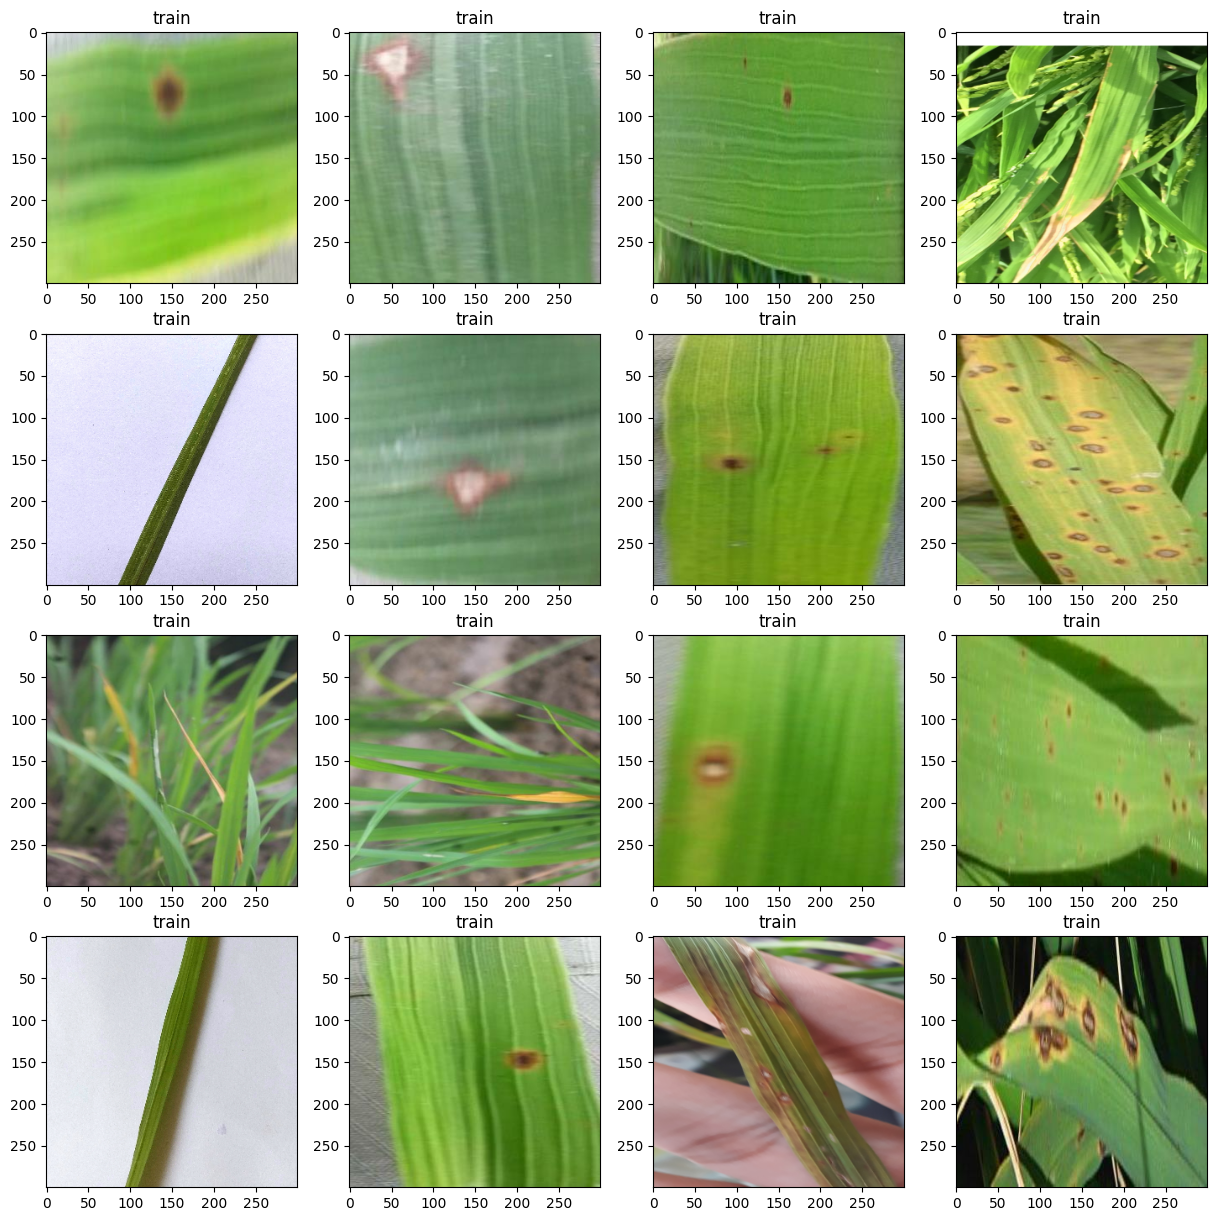

In [ ]:
plt.figure(figsize=(15,15))
for i,j in dataset.take(1):
  for z in range(16):
    pics=plt.subplot(4,4,z+1)
    plt.imshow(i[z].numpy().astype("uint8"))
    plt.title(class_names[j[z]])

In [ ]:
plt.figure(figsize=(15,15))
for i,j in dataset.take(1):
  for z in range(16):
    image_array = i[z].numpy().astype("uint8")
    n_image_array = 255 - image_array
    pics=plt.subplot(4,4,z+1)
    plt.imshow(n_image_array)
    plt.title(class_names[j[z]])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
print(data_augmentation)

In [ ]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/train',
    label_mode='categorical',
    batch_size=32
)

val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/validation',
    label_mode='categorical',
    batch_size=32
)


In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
CHANNELS=3
EPOCHS=40

In [ ]:
input_shape = (Batch_Size,Image_Size , Image_Size, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

In [ ]:
'''model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)'''

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy'],
)


In [ ]:
# Define the path to your dataset directory
data=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Leaf Disease Dataset/train",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size


) # Replace with the actual path


# Define image dimensions and batch size
img_height, img_width = 300, 300
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/train',
    label_mode='categorical',
    batch_size=32
)

val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/validation',
    label_mode='categorical',
    batch_size=32
)


# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_ds.class_indices), activation='softmax'))  # Adjust for your specific dataset

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_ds)

In [ ]:
# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_height, img_width = 300, 300
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

# Load and preprocess the validation data
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Leaf Disease Dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # Adjust for your specific dataset

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=val_generator)


In [ ]:
# Assuming you have a separate directory for test images
test_dir = '/content/drive/MyDrive/Leaf Disease Dataset/validation'  # Replace with the actual path

# Create an ImageDataGenerator for test data (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test set
#test_loss, test_accuracy = model.evaluate(test_data)
#print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
predictions = model.predict(test_data)

# Convert one-hot encoded predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test data generator
true_classes = test_data.classes

# Calculate confusion matrix and other evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=train_data.class_indices.keys()))


In [ ]:
import os
import cv2

def create_negative_image(input_path, output_path):
    # Check if the output directory exists, if not, create it
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Loop through each file in the input directory
    for filename in os.listdir(input_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Read the image
            img_path = os.path.join(input_path, filename)
            img = cv2.imread(img_path)

            # Create a negative image by inverting the colors
            negative_img = cv2.bitwise_not(img)

            # Save the negative image to the output directory
            output_filename = os.path.join(output_path, 'negative_' + filename)
            cv2.imwrite(output_filename, negative_img)

if __name__ == "__main__":
    # Specify the input and output directories
    input_directory = "/content/drive/MyDrive/Leaf Disease Dataset/validation/Severe Tungro"
    output_directory = "/content/drive/MyDrive/Leaf Disease Dataset/test/Severe Tungro"

    # Call the function to create negative images
    create_negative_image(input_directory, output_directory)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
def create_leaf_disease_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Set your dataset and model parameters
input_shape = (224, 224, 3)  # Adjust based on your image size
num_classes = 10  # Adjust based on the number of disease classes

# Create the model
model = create_leaf_disease_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set your dataset directory
train_dir = 'path/to/train_dataset'
validation_dir = 'path/to/validation_dataset'

# Use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=input_shape[:2],
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=input_shape[:2],
                                                        batch_size=32,
                                                        class_mode='categorical')

# Train the model
history = model.fit(train_generator,
                    epochs=10,  # Adjust based on your needs
                    validation_data=validation_generator)

# Save the model
model.save('leaf_disease_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define image dimensions and batch size
img_height, img_width = 300, 300
batch_size = 32

# Define the path to your dataset directory
data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Leaf Disease Dataset/train",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",  # Specify "training" or "validation" for the split
    seed=42  # Add a seed for reproducibility
)  # Replace with the actual path

# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(data.class_names), activation='softmax'))  # Adjust for your specific dataset

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(data, epochs=10)


In [ ]:
# Assuming you have a separate directory for test images
test_dir = '/content/drive/MyDrive/Leaf Disease Dataset/test'  # Replace with the actual path

# Create an ImageDataGenerator for test data (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test set
#test_loss, test_accuracy = model.evaluate(test_data)
#print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
predictions = model.predict(test_data)

# Convert one-hot encoded predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test data generator
true_classes = test_data.classes

# Calculate confusion matrix and other evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

#print("\nClassification Report:")
#print(classification_report(true_classes, predicted_classes, target_names=data.class_indices.keys()))


In [ ]:
true_classes

In [ ]:
predicted_classes